# Planarity Test
 
Testing a graph for planarity is as simple as using networkx package's planarity test.
  
Note: proving a graph is non-planar is significantly harder and may require looking at this: https://en.wikipedia.org/wiki/Kuratowski%27s_theorem#:~:text=Kuratowski's%20theorem%20states%20that%20a,a%20graph%20isomorphic%20to%20G.  
  
## Random Graph Generator

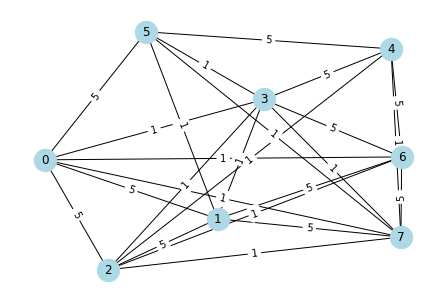

In [1]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

n = 8

def random_row(row_num: int):
    row = list(np.random.choice((0, 1, 5),size=n))
    
    row[row_num] = 0 
    
    # Make sure there's no isolated nodes
    if sum(row) == 0:
        row = random_row(row_num)
    return row

def random_matrix():
    rows = []
    for i in range(0, n):
        rows.append(random_row(i))
    numpy_matrix = np.matrix(rows)
    
    return numpy_matrix

def random_graph():
    np_matrix = random_matrix()
    g = nx.convert_matrix.from_numpy_matrix(
        np_matrix, 
        parallel_edges=False, 
        create_using=nx.Graph
    )
    
    pos = nx.spring_layout(g)
    nx.draw(g, 
            pos=pos,
            node_color='lightblue', 
            with_labels=True, 
            node_size=500)
    labels = nx.get_edge_attributes(g,'weight')
    nx.draw_networkx_edge_labels(g,pos,edge_labels=labels)
    
    return g, np_matrix

G, adjacency_matrix = random_graph()

False


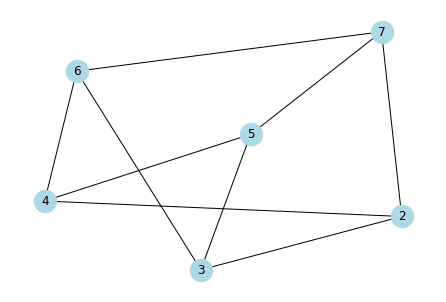

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

is_planar, kuratowski_counter_example = nx.check_planarity(G, True)
print(is_planar)
nx.draw(kuratowski_counter_example, node_color='lightblue', 
        with_labels=True, 
        node_size=500)